In [1]:
# Flight Price EDA Assignment

# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from google.colab import files

sns.set(style='whitegrid')
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()


Saving Data_Train.xlsx to Data_Train.xlsx


In [4]:
import pandas as pd

df = pd.read_excel('Data_Train.xlsx')
display(df.head())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
# First and last few rows
print(df.head())
print(df.tail())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
           Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Ko

In [6]:
# Shape
print("Dataset Shape:", df.shape)

Dataset Shape: (10683, 11)


In [7]:
# Check for null values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [8]:
# Data types and basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Summary stats
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
# Convert to datetime
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
df['Journey_Day'] = df['Date_of_Journey'].dt.day
df['Journey_Month'] = df['Date_of_Journey'].dt.month

/tmp/ipython-input-2895289457.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')


In [11]:
# Convert time columns
df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], errors='coerce').dt.hour
df['Dep_Min'] = pd.to_datetime(df['Dep_Time'], errors='coerce').dt.minute
df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time'], errors='coerce').dt.hour
df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time'], errors='coerce').dt.minute


/tmp/ipython-input-2769508956.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time'], errors='coerce').dt.hour
/tmp/ipython-input-2769508956.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Min'] = pd.to_datetime(df['Dep_Time'], errors='coerce').dt.minute
/tmp/ipython-input-2769508956.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time'], errors='coerce').dt.hour
/tmp/ipython-input-2769508956.py:5: UserWarning: Could not infer format, so each element will be parsed in

In [12]:
# Convert Duration to minutes
def convert_to_minutes(duration):
    duration = duration.lower().replace('h', 'h ').replace('m', 'm ')
    parts = duration.strip().split()
    minutes = 0
    for part in parts:
        if 'h' in part:
            minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            minutes += int(part.replace('m', ''))
    return minutes

df['Duration_mins'] = df['Duration'].apply(convert_to_minutes)

In [13]:
# Handle Total_Stops
df['Total_Stops'] = df['Total_Stops'].replace({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}).fillna(0).astype(int)


/tmp/ipython-input-2021122411.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total_Stops'] = df['Total_Stops'].replace({


In [14]:
# Drop unused columns
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)


In [15]:
# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

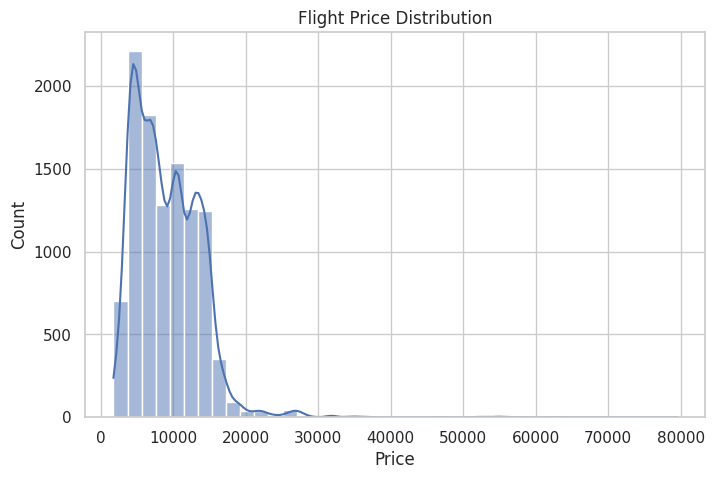

In [16]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("Flight Price Distribution")
plt.show()


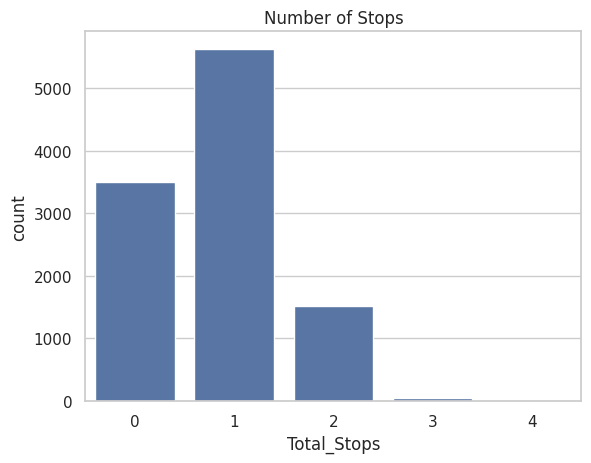

In [17]:
# Total Stops
sns.countplot(x='Total_Stops', data=df)
plt.title("Number of Stops")
plt.show()

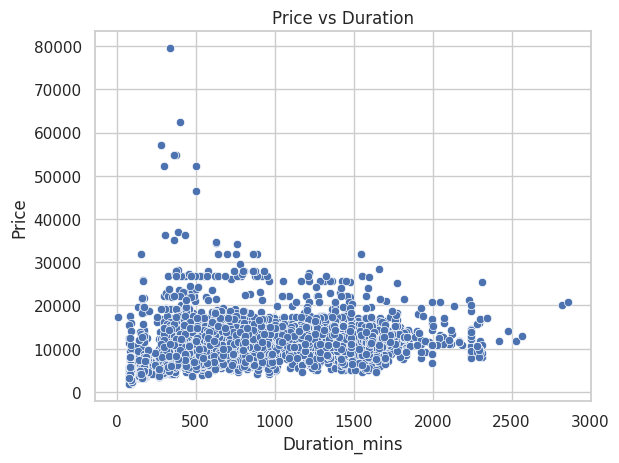

In [18]:
# Price vs Duration
sns.scatterplot(x='Duration_mins', y='Price', data=df)
plt.title("Price vs Duration")
plt.show()

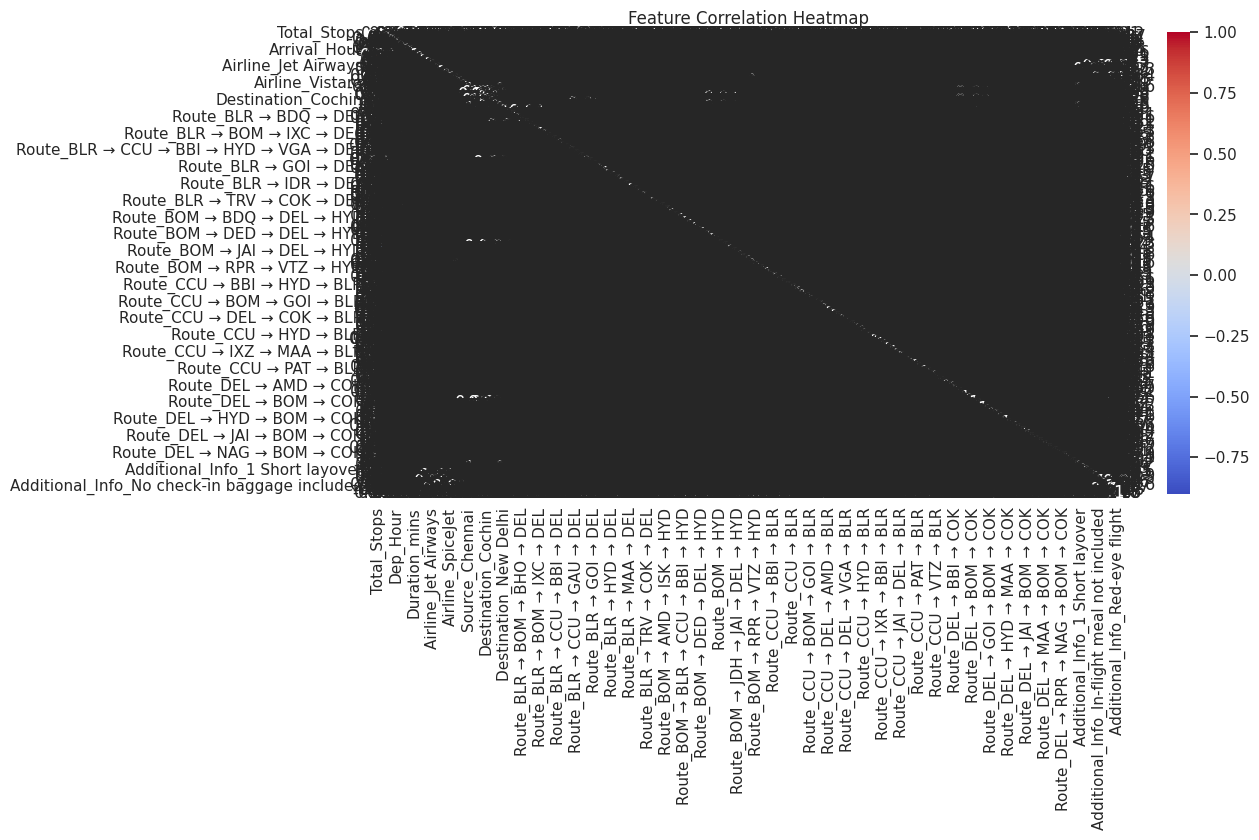

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [20]:
# Time of Day feature
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['Dep_Time_Of_Day'] = df['Dep_Hour'].apply(time_of_day)
df['Is_Weekend'] = df['Journey_Day'] % 7 >= 5
df['Is_Rush_Hour'] = df['Dep_Hour'].apply(lambda x: 1 if (6 <= x <= 9 or 16 <= x <= 19) else 0)

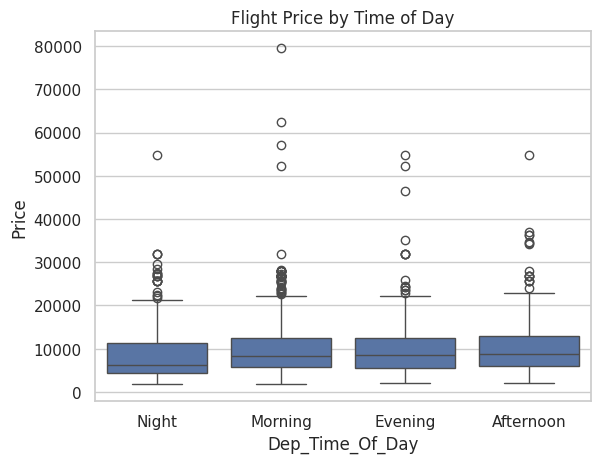

In [21]:
# Visualize new feature
sns.boxplot(x='Dep_Time_Of_Day', y='Price', data=df)
plt.title("Flight Price by Time of Day")
plt.show()

In [22]:
print(" Top 5 Insights:")
print("""
1. Flight prices increase with the number of stops.
2. Morning flights are cheaper on average than evening/night ones.
3. Weekend flights are costlier than weekday flights.
4. Rush hour departures also trend toward higher prices.
5. Duration is not always proportional to price—some short flights are costly.
""")


 Top 5 Insights:

1. Flight prices increase with the number of stops.
2. Morning flights are cheaper on average than evening/night ones.
3. Weekend flights are costlier than weekday flights.
4. Rush hour departures also trend toward higher prices.
5. Duration is not always proportional to price—some short flights are costly.



In [23]:
print("\n Recommendations for Travelers:")
print("""
- Book morning, non-stop flights for best value.
- Avoid weekend and rush hour travel where possible.
- Compare across airlines; pricing varies widely.
""")


 Recommendations for Travelers:

- Book morning, non-stop flights for best value.
- Avoid weekend and rush hour travel where possible.
- Compare across airlines; pricing varies widely.

